In [75]:
pip install ucimlrepo

In [76]:
pip install umap-learn

In [77]:
pip install shap

In [78]:
pip install -U imbalanced-learn


In [79]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
import umap
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline

In [158]:
newdirectory = "drive/MyDrive"
datafolder = 'Interview/bank-additional'
file = 'bank-additional-full.csv'
print(os.path.join(newdirectory, datafolder, file))
temp = pd.read_csv(os.path.join(newdirectory, datafolder, file),delimiter=';')
label = temp['y']
label = label.map({"yes": 1, "no": 0})

temp

drive/MyDrive/Interview/bank-additional/bank-additional-full.csv


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


#Import Data

In [80]:
temp = temp.drop('y',axis = 1)
temp

drive/MyDrive/Interview/bank-additional/bank-additional-full.csv


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6


In [81]:
# check the label
label

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int64

In [82]:
# obtain categorical variables
unique_counts = temp.select_dtypes(include='object').nunique()
unique_counts

job            12
marital         4
education       8
default         3
housing         3
loan            3
contact         2
month          10
day_of_week     5
poutcome        3
dtype: int64

In [83]:
# obtain categorical variables name

cat_vars = temp.select_dtypes(include='object').columns.tolist()
cat_vars

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

# Visualize Data

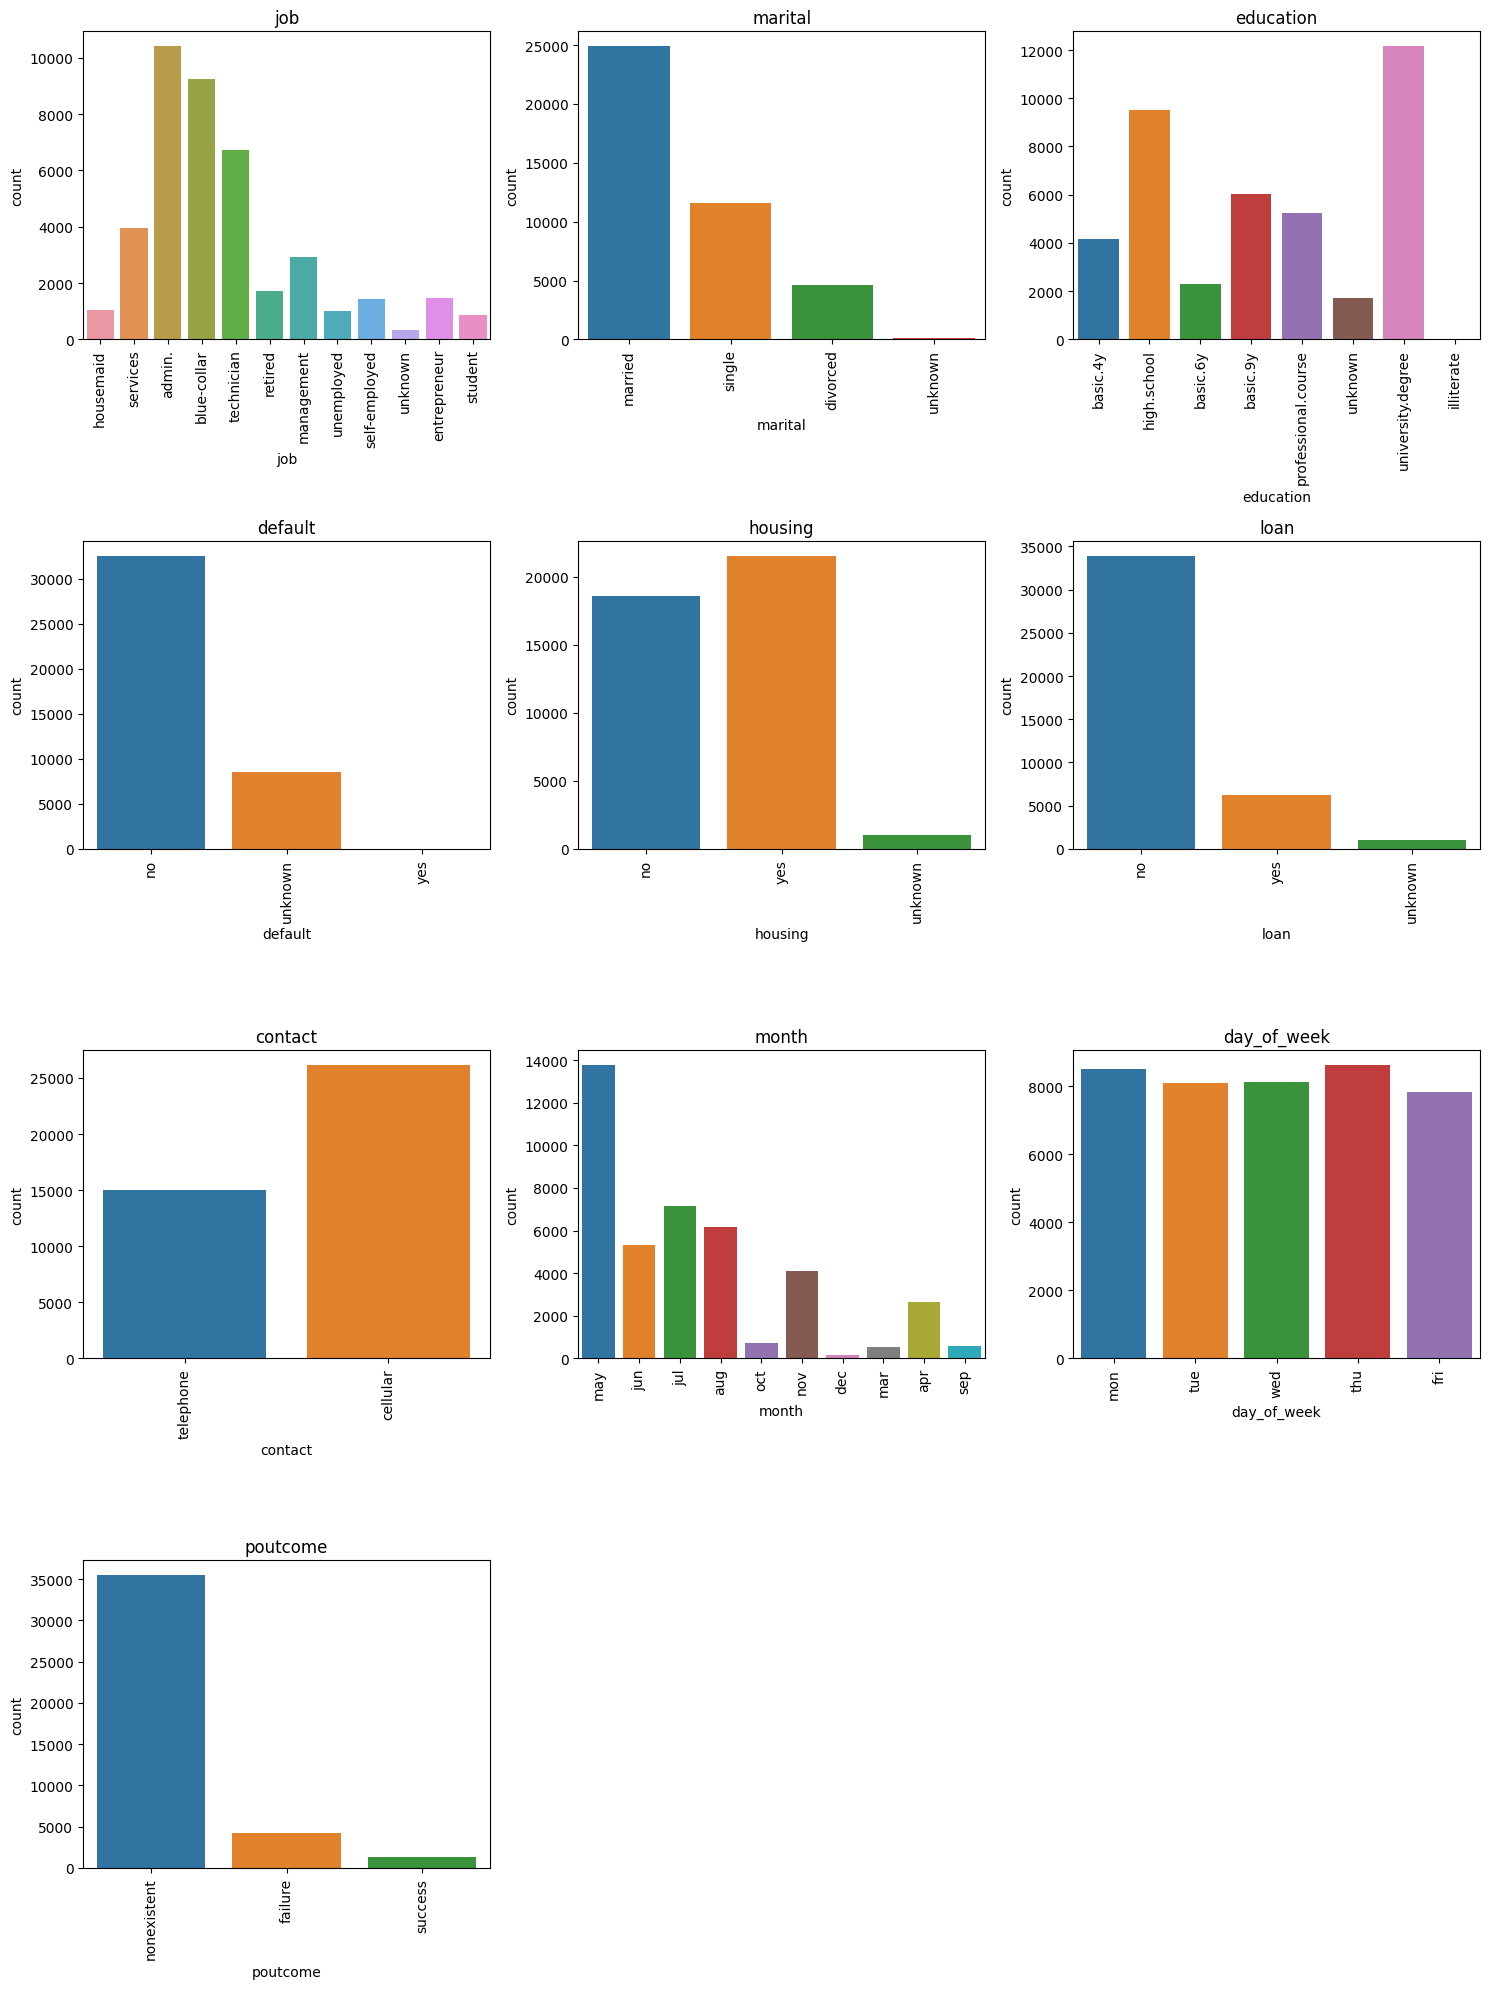

In [84]:
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_conf_matrix(y_test, y_pred):
  class_mapping = {'no': 0, 'yes': 1}

  # Assuming you have y_test_int and qda_pred_int as integer labels
  confusion_matrix = tf.math.confusion_matrix(y_test, y_pred)

  # Convert the TensorFlow tensor to a NumPy array
  confusion_matrix = confusion_matrix.numpy()

  # Now you can create the heatmap with the NumPy array
  import matplotlib.pyplot as plt
  import seaborn as sns

  plt.figure(figsize=(8, 6))
  sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues',
              xticklabels=class_mapping.keys(), yticklabels=class_mapping.keys())

  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.title('Confusion Matrix')
  plt.show()

def plot_all_barchart(cat_vars,temp):
  num_cols = len(cat_vars)  # Use the number of columns in 'temp'

  # Calculate the number of rows needed based on the number of columns
  num_rows = (num_cols + 2) // 3

  # Create subplots based on the number of rows and columns
  fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5 * num_rows))
  axs = axs.flatten()

  # Iterate through the columns of the DataFrame 'temp'
  for i, var in enumerate(cat_vars):
      top_values = temp[var].value_counts().index
      filtered_df = temp[temp[var].isin(top_values)]
      sns.countplot(x=var, data=filtered_df, ax=axs[i])
      axs[i].set_title(var)
      axs[i].tick_params(axis='x', rotation=90)

  # If you have extra subplots that were not used, remove them
  if num_cols < len(axs):
      for i in range(num_cols, len(axs)):
          fig.delaxes(axs[i])

  fig.tight_layout()
  plt.show()

plot_all_barchart(cat_vars,temp)

# One Hot Encode

In [85]:
cat_vars

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [113]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Assuming 'temp' is your DataFrame with both numeric and categorical columns
categorical_columns = cat_vars
numeric_columns = ["age", "duration", "pdays", "cons.price.idx", "emp.var.rate", "cons.conf.idx", "euribor3m", "nr.employed"]

# Separate categorical and numeric columns
categorical_data = temp[categorical_columns]
numeric_data = temp[numeric_columns]
    #

# Define the ColumnTransformer
ct = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore"), categorical_columns),
    remainder="passthrough"  # Set "drop" to discard any columns not explicitly transformed
)

# Fit and transform the data with the ColumnTransformer
temp_one_hot = ct.fit_transform(temp)

# Convert the transformed data to a DataFrame
X = pd.DataFrame(temp_one_hot)
X


,0,1,2,3,4,5,6,7,8,9,...,53,54,55,56,57,58,59,60,61,62
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,56.0,261.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,57.0,149.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,37.0,226.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,40.0,151.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,56.0,307.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,73.0,334.0,1.0,999.0,0.0,-1.1,94.767,-50.8,1.028,4963.6
41184,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,46.0,383.0,1.0,999.0,0.0,-1.1,94.767,-50.8,1.028,4963.6
41185,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,56.0,189.0,2.0,999.0,0.0,-1.1,94.767,-50.8,1.028,4963.6
41186,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,44.0,442.0,1.0,999.0,0.0,-1.1,94.767,-50.8,1.028,4963.6


In [114]:
yes_count = label[label == 1].count()
no_count = label[label == 0].count()
yes_count, no_count

(4640, 36548)

# Visualize Data 2

In [115]:
# Apply UMAP for dimensionality reduction
reducer = umap.UMAP(n_components=2)
X_umap = reducer.fit_transform(X)



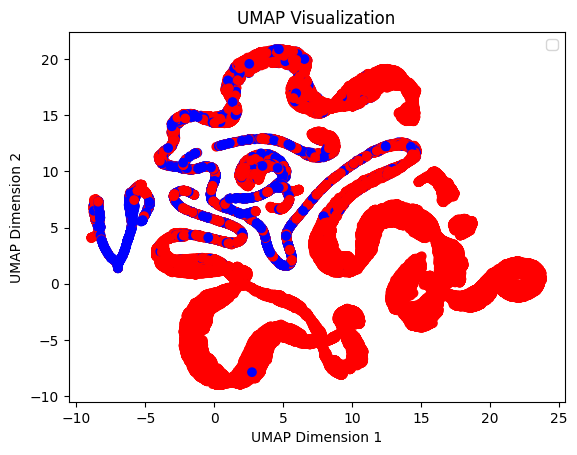

In [116]:
# Create a dictionary to map class labels to colors
class_to_color = {1: 'blue', 0: 'red'}  # You can choose your own colors

# Map class labels to colors
colors = [class_to_color[label1] for label1 in label]  # Assuming 'y' contains your class labels

plt.scatter(X_umap[:, 0], X_umap[:, 1], c=colors)
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.title('UMAP Visualization')
plt.legend()
plt.show()

In [117]:
X = np.asarray(X)
y = np.asarray(label)
# Define the SMOTE oversampler
smote = SMOTE(sampling_strategy="auto", random_state=42)

# Define the SMOTE oversampler with custom settings
smote = SMOTE(
    sampling_strategy=1,  # Set the desired ratio between minority and majority classes
    random_state=42,        # Set a fixed random seed for reproducibility
    k_neighbors=5,          # Number of nearest neighbors to consider when generating synthetic samples
    n_jobs=-1               # Use all available CPU cores for parallel processing
)

# Apply SMOTE to the data
X_resampled, y_resampled = smote.fit_resample(X, y)
y_resampled = y_resampled.tolist()
yes_count = y_resampled.count(1)
no_count = y_resampled.count(0)
yes_count, no_count

/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/base.py:345: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


(36548, 36548)

In [118]:
X = X_resampled
y = y_resampled

In [119]:
# label = pd.get_dummies(label)
y = np.asarray(y)
X = np.asarray(X)

X.shape,y.shape

((73096, 63), (73096,))

# Training Preprocessing

In [120]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42,stratify=y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((58476, 63), (14620, 63), (58476,), (14620,))

In [122]:
def plotroc(y_test,y_pred):
    # Calculate ROC curve
  fpr, tpr, thresholds = roc_curve(y_test, dt_pred)

  # Plot ROC curve
  plt.figure(figsize=(8, 6))
  plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_score))
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve')
  plt.legend(loc='lower right')
  plt.show()

#Apply QDA

In [124]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)




/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

In [137]:
def ssscore(y_test,y_pred):
  conf_matrix = confusion_matrix(y_test, y_pred)

  # Extract TP, TN, FP, FN
  TP = conf_matrix[1, 1]
  TN = conf_matrix[0, 0]
  FP = conf_matrix[0, 1]
  FN = conf_matrix[1, 0]

  # Calculate sensitivity and specificity
  sensitivity = TP / (TP + FN)
  specificity = TN / (TN + FP)

  print(f"Yes \n Sensitivity: {sensitivity:.2%}\nSpecificity: {specificity:.2%}")

  # Extract TP, TN, FP, FN
  TP = conf_matrix[0, 0]
  TN = conf_matrix[1, 1]
  FP = conf_matrix[1, 0]
  FN = conf_matrix[0, 1]

  # Calculate sensitivity and specificity
  sensitivity = TP / (TP + FN)
  specificity = TN / (TN + FP)

  print(f"No \n Sensitivity: {sensitivity:.2%}\nSpecificity: {specificity:.2%}")



Train Accuracy: 61.47%
Yes 
 Sensitivity: 98.22%
Specificity: 25.08%
No 
 Sensitivity: 25.08%
Specificity: 98.22%
Accuracy: 0.616484268125855
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.25      0.40      7310
           1       0.57      0.98      0.72      7310

    accuracy                           0.62     14620
   macro avg       0.75      0.62      0.56     14620
weighted avg       0.75      0.62      0.56     14620

AUC Score: 0.616484268125855


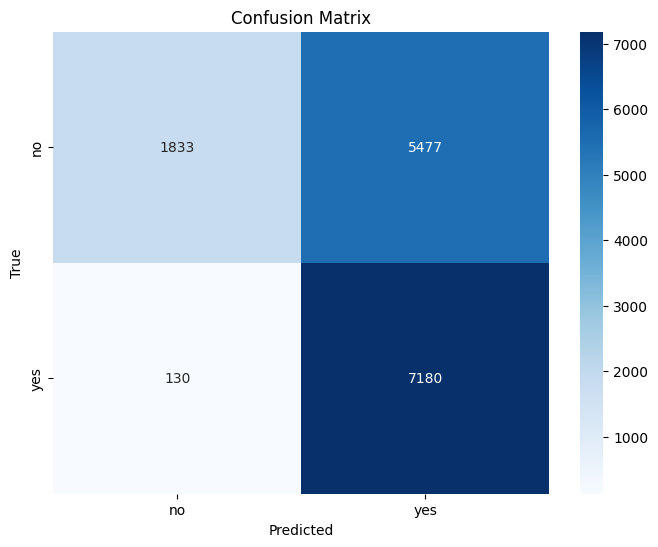

In [142]:
from sklearn.metrics import accuracy_score

y_pred = qda.predict(X_train)
# Evaluate the model
accuracy = accuracy_score(y_train, y_pred)
print("Train Accuracy: {:.2f}%".format(accuracy * 100))

# Make predictions
qda_pred = qda.predict(X_test)

# Evaluate the model
qda_accuracy = accuracy_score(y_test, qda_pred)


auc_score = roc_auc_score(y_test, qda_pred)  # Assuming binary classification

ssscore(y_test,qda_pred)

report = classification_report(y_test, qda_pred)
# Print the results
print("Accuracy:", qda_accuracy)
print("Classification Report:\n", report)
print("AUC Score:", auc_score)

plot_conf_matrix(y_test, qda_pred)


#SVM

In [101]:
# Import necessary libraries
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Create an SVM classifier
# svm_classifier = SVC(kernel='linear', C=1)

# # Train the SVM classifier
# history = svm_classifier.fit(X_train, y_train)



In [102]:
# # Make predictions
# svm_pred = svm_classifier.predict(X_train)

# # Evaluate the model
# accuracy = accuracy_score(y_train, svm_pred)
# print("Train Accuracy:", accuracy)

# # Make predictions
# svm_pred = svm_classifier.predict(X_test)

# # Evaluate the model
# svm_accuracy = accuracy_score(y_test, svm_pred)
# print("Test Accuracy:", svm_accuracy)

# plot_conf_matrix(y_test, svm_pred)
# # from sklearn.metrics import roc_curve, auc
# # from sklearn.metrics import roc_auc_score
# # ns_auc = roc_auc_score(Ytest, ynew)

#Decision Tree

Yes 
 Sensitivity: 93.70%
Specificity: 93.58%
No 
 Sensitivity: 93.58%
Specificity: 93.70%
Accuracy: 0.9363885088919288
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      7332
           1       0.94      0.94      0.94      7288

    accuracy                           0.94     14620
   macro avg       0.94      0.94      0.94     14620
weighted avg       0.94      0.94      0.94     14620

AUC Score: 0.9363904029851551


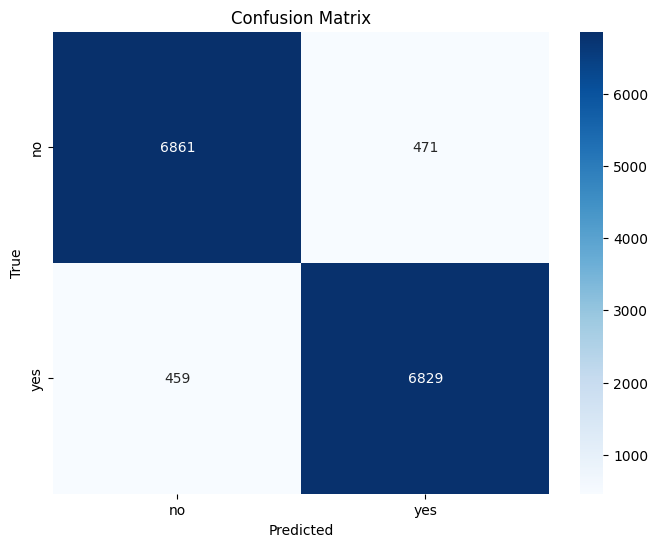

In [147]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score



# 4. Create a Decision Tree classifier and fit it to the training data
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# 5. Make predictions on the test data
dt_pred = clf.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)

auc_score = roc_auc_score(y_test, dt_pred)  # Assuming binary classification

ssscore(y_test,dt_pred)

report = classification_report(y_test, dt_pred)
# Print the results
print("Accuracy:", dt_accuracy)
print("Classification Report:\n", report)
print("AUC Score:", auc_score)

plot_conf_matrix(y_test, dt_pred)

In [104]:
# Calculate the AUC score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, roc_auc_score

p = ["no",'yes']
auc_score = roc_auc_score(to_categorical(y_test), to_categorical(dt_pred))  # Assuming binary classification

print("AUC Score:", auc_score)

plotroc(y_test, dt_pred)

# print(f"{p[0]} \n  F1: {ev[0]*100}%% \n  Sensitivity: {ev[0][1]*100}%% \n  Specificity: {ev[0][2]*100}%%")
# print(f"{p[1]} \n  F1: {ev[1]*100}%% \n  Sensitivity: {ev[1][1]*100}%% \n  Specificity: {ev[1][2]*100}%%")


KeyError: ignored

In [ ]:
plot_conf_matrix(y_test, dt_pred)

#LDA


Yes 
 Sensitivity: 85.40%
Specificity: 87.00%
No 
 Sensitivity: 87.00%
Specificity: 85.40%
Accuracy: 0.8620383036935705
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.86      7332
           1       0.87      0.85      0.86      7288

    accuracy                           0.86     14620
   macro avg       0.86      0.86      0.86     14620
weighted avg       0.86      0.86      0.86     14620

AUC Score: 0.8620142041592634


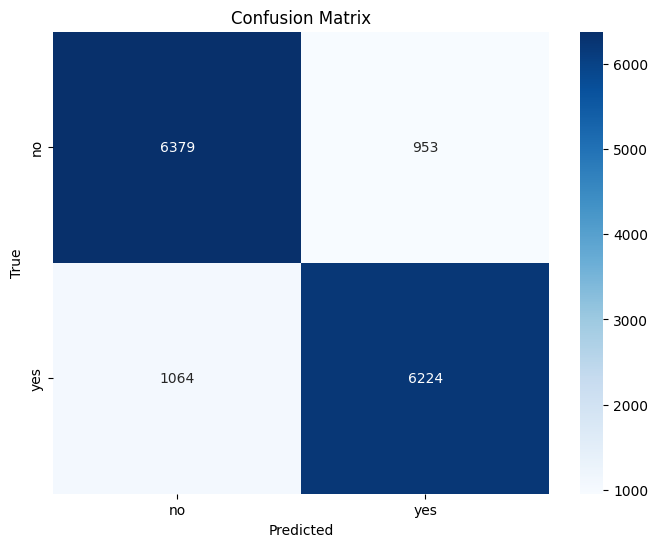

In [151]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 3. Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Create an LDA classifier and fit it to the training data
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# 5. Make predictions on the test data
lda_pred = lda.predict(X_test)
auc_score = roc_auc_score(y_test, lda_pred)  # Assuming binary classification

ssscore(y_test,lda_pred)
lda_accuracy = accuracy_score(y_test, lda_pred)

report = classification_report(y_test, lda_pred)
# Print the results
print("Accuracy:", lda_accuracy)
print("Classification Report:\n", report)
print("AUC Score:", auc_score)

plot_conf_matrix(y_test, lda_pred)

In [ ]:
plot_conf_matrix(y_test, lda_pred)

#RF

Yes 
 Sensitivity: 93.51%
Specificity: 96.85%
No 
 Sensitivity: 96.85%
Specificity: 93.51%
Accuracy: 0.9518467852257182
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95      7332
           1       0.97      0.94      0.95      7288

    accuracy                           0.95     14620
   macro avg       0.95      0.95      0.95     14620
weighted avg       0.95      0.95      0.95     14620

AUC Score: 0.9517965321107181


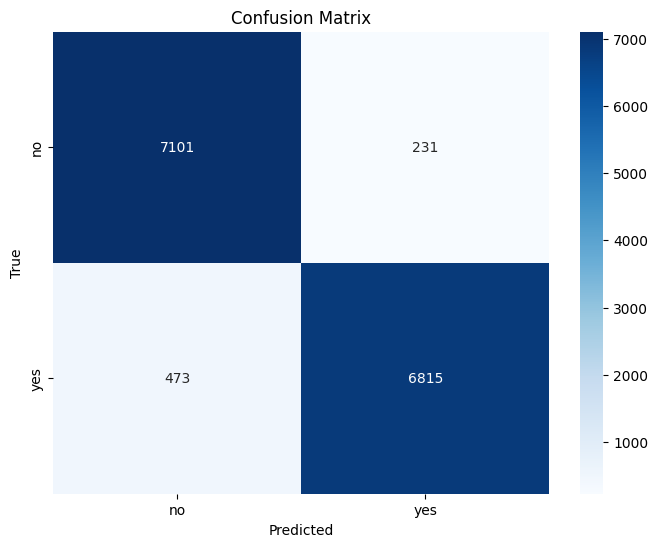

In [152]:
from sklearn.ensemble import RandomForestClassifier


# 4. Create a Random Forest classifier and fit it to the training data
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# 5. Make predictions on the test data
rf_pred = rf_classifier.predict(X_test)

auc_score = roc_auc_score(y_test, rf_pred)  # Assuming binary classification

ssscore(y_test,rf_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)

report = classification_report(y_test, rf_pred)
# Print the results
print("Accuracy:", rf_accuracy)
print("Classification Report:\n", report)
print("AUC Score:", auc_score)

plot_conf_matrix(y_test, rf_pred)





#ADABOOST

Yes 
 Sensitivity: 92.34%
Specificity: 95.19%
No 
 Sensitivity: 95.19%
Specificity: 92.34%
Accuracy: 0.9376880984952121
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94      7332
           1       0.95      0.92      0.94      7288

    accuracy                           0.94     14620
   macro avg       0.94      0.94      0.94     14620
weighted avg       0.94      0.94      0.94     14620

AUC Score: 0.9376453337788788


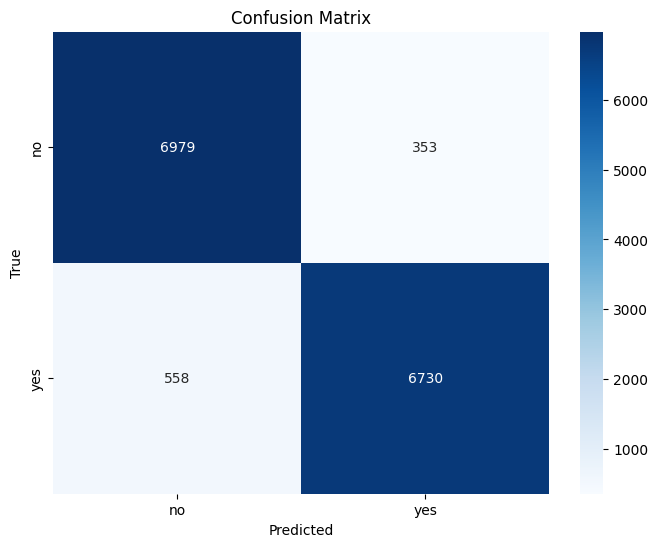

In [154]:
from sklearn.ensemble import AdaBoostClassifier


# Create an AdaBoost classifier with a base estimator (e.g., Decision Tree)
base_estimator = DecisionTreeClassifier(max_depth=1)  # A simple decision stump
adaboost_classifier = AdaBoostClassifier(base_estimator, n_estimators=50, random_state=42)

# Train the AdaBoost classifier on the training data
adaboost_classifier.fit(X_train, y_train)

# Make predictions on the test data
adaboost_pred = adaboost_classifier.predict(X_test)

auc_score = roc_auc_score(y_test, adaboost_pred)  # Assuming binary classification

ssscore(y_test,adaboost_pred)
adaboost_accuracy = accuracy_score(y_test, adaboost_pred)

report = classification_report(y_test, adaboost_pred)
# Print the results
print("Accuracy:", adaboost_accuracy)
print("Classification Report:\n", report)
print("AUC Score:", auc_score)

plot_conf_matrix(y_test, adaboost_pred)



#NaiveBayes

Yes 
 Sensitivity: 65.81%
Specificity: 87.12%
No 
 Sensitivity: 87.12%
Specificity: 65.81%
Accuracy: 0.7649794801641587
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.87      0.79      7332
           1       0.84      0.66      0.74      7288

    accuracy                           0.76     14620
   macro avg       0.78      0.76      0.76     14620
weighted avg       0.78      0.76      0.76     14620

AUC Score: 0.7646586875689803


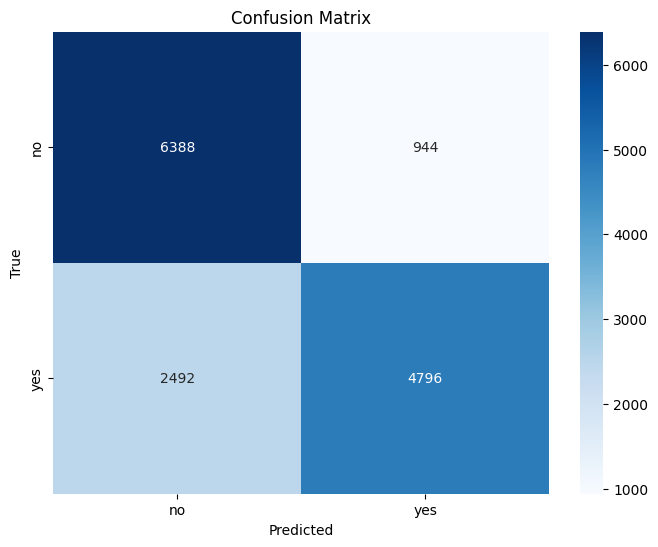

In [156]:
from sklearn.naive_bayes import GaussianNB

# 4. Create a Gaussian Naive Bayes classifier and fit it to the training data
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# 5. Make predictions on the test data
nb_pred = nb_classifier.predict(X_test)

auc_score = roc_auc_score(y_test, nb_pred)  # Assuming binary classification

ssscore(y_test,nb_pred)
nb_accuracy = accuracy_score(y_test, nb_pred)

report = classification_report(y_test, nb_pred)
# Print the results
print("Accuracy:", nb_accuracy)
print("Classification Report:\n", report)
print("AUC Score:", auc_score)

plot_conf_matrix(y_test, nb_pred)

# Fine Tuning

In [157]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.datasets import load_iris

# # Load your dataset or replace this with your dataset

# # Define the Random Forest classifier
# rf_classifier = RandomForestClassifier(random_state=42)

# # Define the hyperparameters and their values to search
# param_grid = {
#     'n_estimators': [50, 100, 200],    # Number of trees in the forest
#     'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
#     'min_samples_split': [2, 5, 10], # Minimum samples required to split an internal node
#     'min_samples_leaf': [1, 2, 4]    # Minimum samples required to be a leaf node
# }

# # Create the GridSearchCV object
# grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# # Perform the grid search
# grid_search.fit(X_train, y_train)

# # Print the best hyperparameters and the corresponding score
# print("Best Parameters:", grid_search.best_params_)
# print("Best Score:", grid_search.best_score_)


KeyboardInterrupt: ignored

In [ ]:
# # 4. Create a Random Forest classifier and fit it to the training data
# rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
# rf_classifier.fit(X_train, y_train)

# # 5. Make predictions on the test data
# rf_pred = rf_classifier.predict(X_test)

# auc_score = roc_auc_score(y_test, rf_pred)  # Assuming binary classification

# ssscore(y_test,rf_pred)
# rf_accuracy = accuracy_score(y_test, rf_pred)

# report = classification_report(y_test, rf_pred)
# # Print the results
# print("Accuracy:", rf_accuracy)
# print("Classification Report:\n", report)
# print("AUC Score:", auc_score)

# plot_conf_matrix(y_test, rf_pred)